# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [8]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


In [3]:
filename = "training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

In [5]:
filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

In [6]:
filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

In [7]:
train_images.shape, train_digits.shape

((2726, 28, 28, 3), (2726,))

In [23]:
np.unique(train_digits)

array([0, 1, 2])

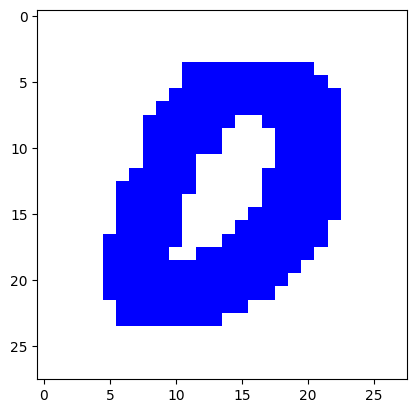

In [19]:
# Visualize
plt.imshow(train_images[1862])

In [45]:
X_train = train_images.reshape((train_images.shape[0],-1))
y_train = train_digits
X_test = test_images_1.reshape((test_images_1.shape[0],-1))
y_test = test_digits_1
X_test1 = test_images_2.reshape((test_images_2.shape[0],-1))
y_test1 = test_digits_2

In [47]:
class model:

    def train(self,X_train,y_train,layer_sizes = (16, 32, 64,128,3)):
        self.clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes= layer_sizes, random_state=1)
        self.clf.fit(X_train, y_train)  

    def predict(self,X_test,y_test):
        y_pred = self.clf.predict(X_test)
        accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
        return accuracy,y_pred
    
    def plot(self,test_images,y_test,y_pred):
        num_images = test_images.shape[0]
        indexes = np.random.choice(num_images, 5, replace=False)
        
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))

        for i, index in enumerate(indexes):
            true_label = y_test[index]
            predicted_label = y_pred[index]

            axes[i].imshow(test_images[index], cmap='gray')
            axes[i].set_title(f'True: {true_label}\nPredicted: {predicted_label}')
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()



     


**Testing with a model with multiple hidden layers of sizes (16, 32, 64,128,3)**

Accuracy of the model is 99.96822370511599


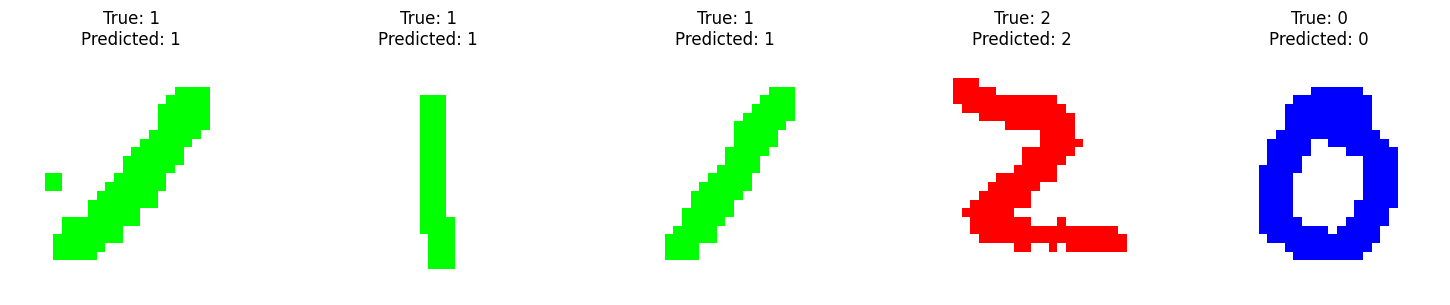

In [40]:
clf1 = model()
clf1.train(X_train,y_train)
accuracy,y_pred = clf1.predict(X_test,y_test)
print(f"Accuracy of the model is {accuracy * 100}")
clf1.plot(test_images_1,y_test,y_pred)

Accuracy of the model is 99.96822370511599


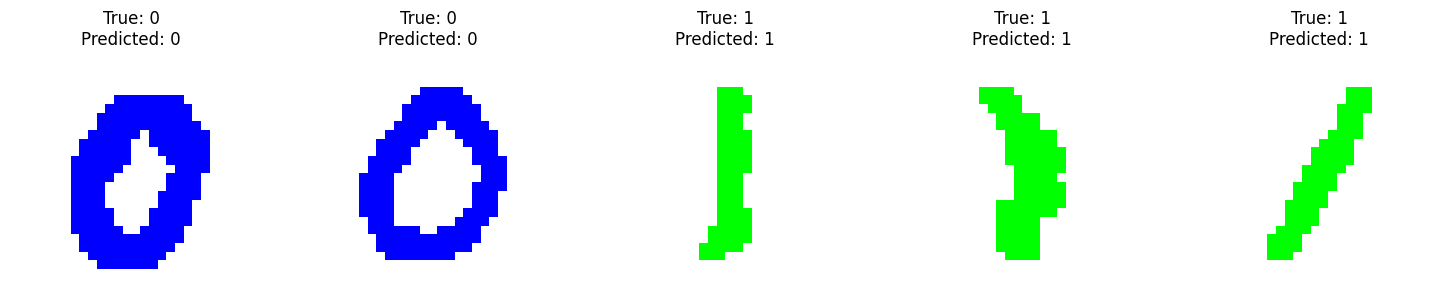

In [48]:
accuracy,y_pred = clf1.predict(X_test1,y_test1)
print(f"Accuracy of the model is {accuracy * 100}")
clf1.plot(test_images_2,y_test1,y_pred)

**Testing with a model with lower number of  hidden layers of sizes (10,5,3)**

Accuracy of the model is 68.8592310136638


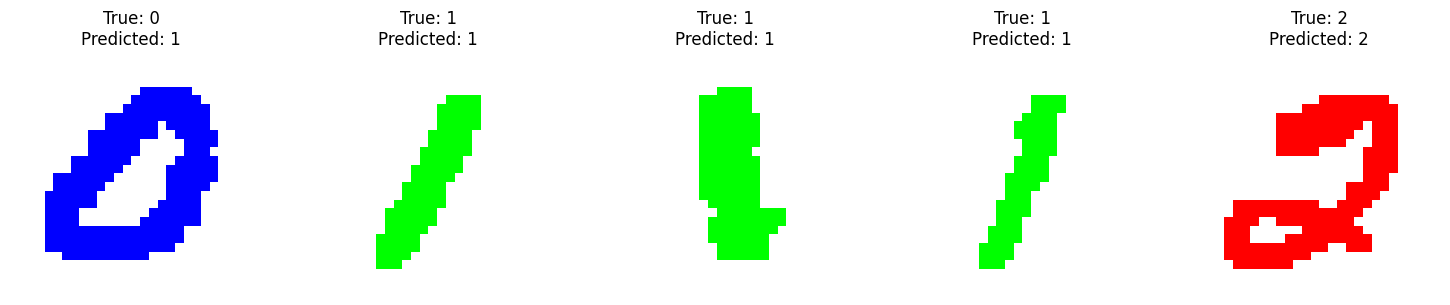

In [43]:
clf2 = model()
clf2.train(X_train,y_train,(10,5,3))
accuracy,y_pred = clf2.predict(X_test,y_test)
print(f"Accuracy of the model is {accuracy * 100}")
clf2.plot(test_images_1,y_test,y_pred)

We find that deeper networks tend to increase the testing accuracy.